# Part 2: Model Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers

In [2]:
df = pd.read_csv('preprocessed_oasis_longitudinal.csv')
df = df. drop('Unnamed: 0', axis=1)
df.head()

,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,2,87,14,2.0,27.0,0,1987,0.696,0.883
1,2,2,88,14,2.0,30.0,0,2004,0.681,0.876
2,1,2,75,12,0.0,23.0,1,1678,0.736,1.046
3,2,2,76,12,0.0,28.0,1,1738,0.713,1.010
4,3,2,80,12,0.0,22.0,1,1698,0.701,1.034


## Split Input and Traget Variables

In [3]:
X = df.drop('CDR', axis = 1) 
y = df['CDR']

In [4]:
X.columns

Index(['Visit', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'], dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (373, 10)
Shape of training dataset: (279, 9)
Shape of testing dataset: (94, 9)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []): 
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:
def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)

#### Detailed Macro & Weighted average values of the performance metrics

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)

#### Performance of the Tarining & Test Set

In [10]:
def f1_acc(y_test, y_hat, y_train, y_hat_train): 
    
    acc_train = metrics.accuracy_score(y_train, y_hat_train)
    print ("Accuracy Score of Train Set:", acc_train)
    
    acc_test = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score of Test Set:", acc_test)
    
    print ('.')
    
    f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
    print ("F1 Score of Train Set:", f1_train)
    
    f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("F1 Score of Test Set:", f1_test)
    
    ax1 = sns.distplot(y_train, hist=False, color='pink', kde_kws={'bw':0.1}, label = 'Train Data')
    sns.distplot(y_hat_train, hist=False, ax=ax1, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Data')
    
    plt.title('Actual vs Predicted Values for Diagnosis (Training Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()
    
    ax2 = sns.distplot(y_test, hist=False, color='salmon', kde_kws={'bw':0.1}, label = 'Test Data')
    sns.distplot(y_hat, hist=False, ax=ax2, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Result')
    plt.title('Actual vs Predicted Values for Diagnosis (Test Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()

#### Let's look at the ROC_AUC, Precision Recall AUC and the Confusion Matrices of the top 5 models

In [11]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

### Model Selection (a) LazyClassifier

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)
model

100%|██████████| 30/30 [00:00<00:00, 36.84it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.89,0.89,0.89,0.89,0.03
ExtraTreesClassifier,0.87,0.87,0.87,0.87,0.12
RandomForestClassifier,0.84,0.84,0.84,0.84,0.15
QuadraticDiscriminantAnalysis,0.84,0.83,0.83,0.84,0.01
LGBMClassifier,0.83,0.82,0.82,0.83,0.05
GaussianNB,0.83,0.82,0.82,0.83,0.01
LabelPropagation,0.81,0.81,0.81,0.81,0.02
LabelSpreading,0.81,0.81,0.81,0.81,0.01
SGDClassifier,0.82,0.81,0.81,0.82,0.01


### Model Selection (b) Trying out Several Models

In [13]:
# Modelling Algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix

#### Let's try to model some classifiers for this dataset

In [14]:
models = [LogisticRegression(), AdaBoostClassifier(), BaggingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), CatBoostClassifier(logging_level='Silent'), ExtraTreeClassifier(), LGBMClassifier(), LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(), EasyEnsembleClassifier(random_state = 25)]

model_names=['LogisticRegression','AdaBoostClassifier', 'BaggingClassifier', 'KNearestNeighbors','RandomForest','BaggingRF', 'XGBoost', 'DecisionTree',
             'GradientBoosting','GaussianNB', 'CatBoost', 'ExtraTree', 'LGBM', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis', 'EasyClassifier']

compare = model_comparison(models, model_names)
compare 

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,LogisticRegression,0.80,0.90,0.78,0.76,0.81,0.77,0.80
1,AdaBoostClassifier,0.76,0.85,0.71,0.74,0.92,0.72,0.77
2,BaggingClassifier,0.83,0.90,0.71,0.94,0.98,0.81,0.85
3,KNearestNeighbors,0.79,0.88,0.68,0.85,0.87,0.76,0.81
4,RandomForest,0.82,0.91,0.78,0.82,1.00,0.80,0.83
5,BaggingRF,0.82,0.91,0.80,0.79,0.97,0.80,0.82
6,XGBoost,0.80,0.89,0.71,0.83,0.96,0.76,0.81
7,DecisionTree,0.79,0.81,0.78,0.74,1.00,0.76,0.79
8,GradientBoosting,0.84,0.91,0.78,0.86,0.99,0.82,0.85
9,GaussianNB,0.82,0.86,0.76,0.84,0.77,0.79,0.83


#### What are the top 5 models with highest Recall Score? (class 1)

In [15]:
top5 = compare.nlargest(5,'Precision')
top5

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
10,CatBoost,0.87,0.93,0.83,0.87,0.99,0.85,0.87
5,BaggingRF,0.82,0.91,0.80,0.79,0.97,0.80,0.82
0,LogisticRegression,0.80,0.90,0.78,0.76,0.81,0.77,0.80
4,RandomForest,0.82,0.91,0.78,0.82,1.00,0.80,0.83
7,DecisionTree,0.79,0.81,0.78,0.74,1.00,0.76,0.79


---------------------------------------------------------------


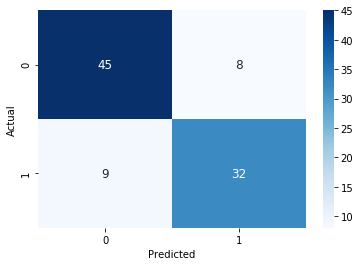

TP: 32, FP: 8, TN: 45, FN: 9
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.833     0.849     0.841        53
           1      0.800     0.780     0.790        41

    accuracy                          0.819        94
   macro avg      0.817     0.815     0.816        94
weighted avg      0.819     0.819     0.819        94

---------------------------------------------------------------
Recall Score: 0.7804878048780488
Macro Average of Recall Score: 0.8147722043258169
Weighted Average of Recall Score: 0.8191489361702128
---------------------------------------------------------------


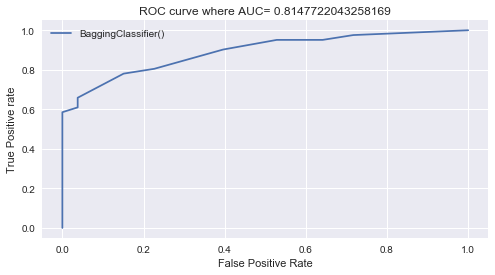

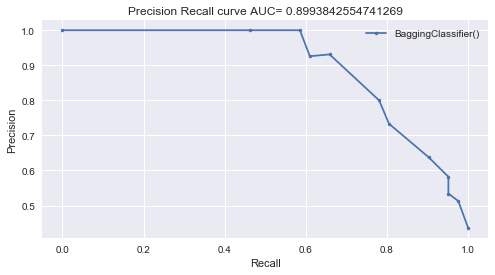

---------------------------------------------------------------


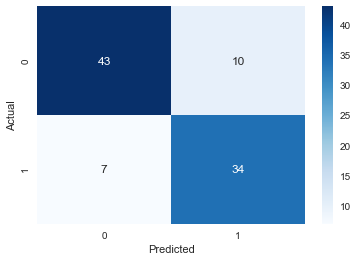

TP: 34, FP: 10, TN: 43, FN: 7
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.860     0.811     0.835        53
           1      0.773     0.829     0.800        41

    accuracy                          0.819        94
   macro avg      0.816     0.820     0.817        94
weighted avg      0.822     0.819     0.820        94

---------------------------------------------------------------
Recall Score: 0.8292682926829268
Macro Average of Recall Score: 0.8202945236999539
Weighted Average of Recall Score: 0.8191489361702128
---------------------------------------------------------------


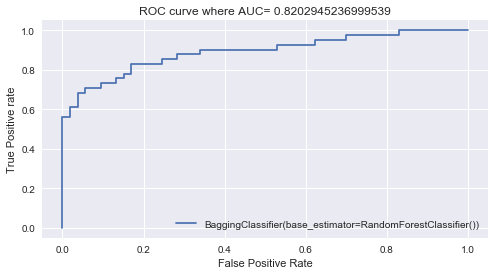

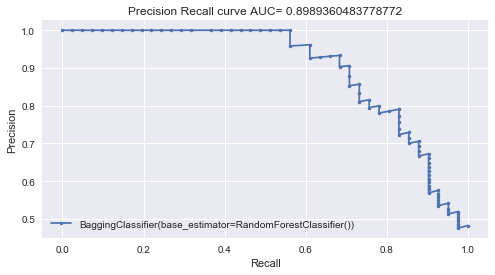

---------------------------------------------------------------


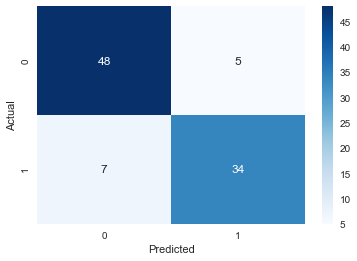

TP: 34, FP: 5, TN: 48, FN: 7
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.873     0.906     0.889        53
           1      0.872     0.829     0.850        41

    accuracy                          0.872        94
   macro avg      0.872     0.867     0.869        94
weighted avg      0.872     0.872     0.872        94

---------------------------------------------------------------
Recall Score: 0.8292682926829268
Macro Average of Recall Score: 0.8674643350207087
Weighted Average of Recall Score: 0.8723404255319149
---------------------------------------------------------------


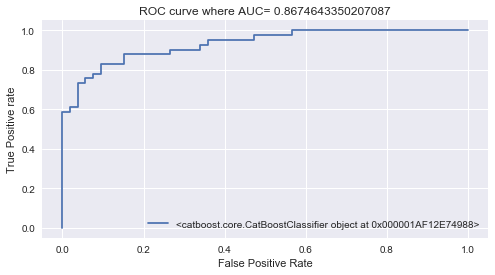

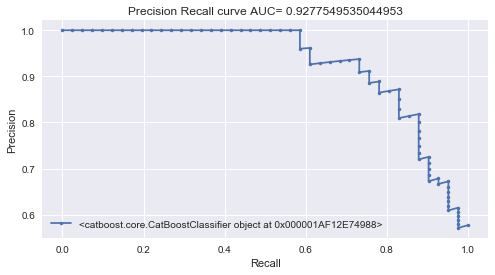

---------------------------------------------------------------


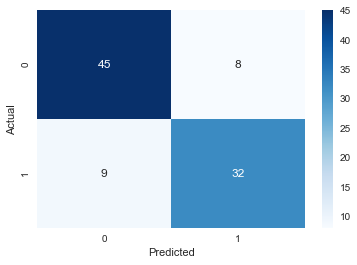

TP: 32, FP: 8, TN: 45, FN: 9
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.833     0.849     0.841        53
           1      0.800     0.780     0.790        41

    accuracy                          0.819        94
   macro avg      0.817     0.815     0.816        94
weighted avg      0.819     0.819     0.819        94

---------------------------------------------------------------
Recall Score: 0.7804878048780488
Macro Average of Recall Score: 0.8147722043258169
Weighted Average of Recall Score: 0.8191489361702128
---------------------------------------------------------------


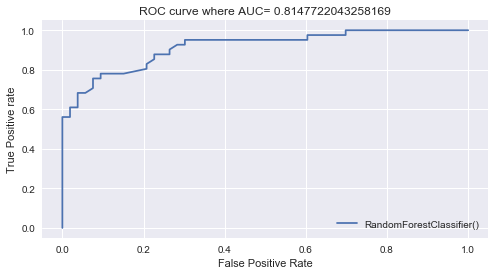

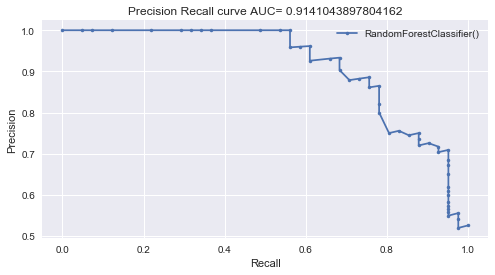

In [16]:
models = [BaggingClassifier(), BaggingClassifier(RandomForestClassifier()), CatBoostClassifier(logging_level='Silent'), RandomForestClassifier()]
roc_pr_cm(models)

### CatBoost OR RandomForest Classifier??

In [17]:
from sklearn import model_selection
from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

model = [CatBoostClassifier(logging_level='Silent'), RandomForestClassifier()]

for m in model:
    
    print ('...............................................')
    
    print (m)

    m.fit(X_train, y_train)
    y_hat = m.predict(X_test)
    y_hat_train = m.predict(X_train)

    macro_weighted_prec_rec(y_test, y_hat)
    

...............................................
Recall Score: 0.8292682926829268
Macro Average of Recall Score: 0.8674643350207087
Weighted Average of Recall Score: 0.8723404255319149
.
Macro Average of Precision Score: 0.8722610722610722
Weighted Average of Precision Score: 0.8723205872142042
Macro Average of F1 Score: 0.8694444444444445
Weighted Average of F1 Score: 0.8719267139479905
.
Accuracy: 0.8723404255319149
...............................................
RandomForestClassifier()
Recall Score: 0.7804878048780488
Macro Average of Recall Score: 0.8242061665899678
Weighted Average of Recall Score: 0.8297872340425532
.
Macro Average of Precision Score: 0.8284382284382283
Weighted Average of Precision Score: 0.829449982641472
Macro Average of F1 Score: 0.825925925925926
Weighted Average of F1 Score: 0.8292356185973208
.
Accuracy: 0.8297872340425532


### Chosen model: Catboost Classifier

Parameters currently in use:

{'logging_level': 'Silent', 'random_state': 42}
 
Accuracy Score of Train Set: 0.996415770609319
Accuracy Score of Test Set: 0.8617021276595744
.
F1 Score of Train Set: 0.996379303632376
F1 Score of Test Set: 0.858088491464406


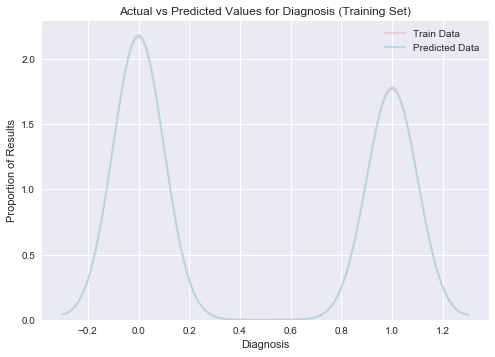

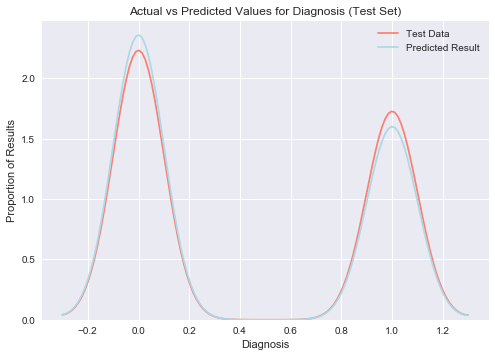

In [18]:
cat = CatBoostClassifier(logging_level='Silent', random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(cat.get_params())

print (' ')

cat.fit(X_train, y_train)
y_hat = cat.predict(X_test)
y_hat_train = cat.predict(X_train)

f1_acc(y_test, y_hat, y_train, y_hat_train)